In [1]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
plt.style.use('bmh')
% matplotlib inline

from utils import DataLoader
from model import Model

def visualize_predicted_destination(x, y_true, y_pred):
    path = x.reshape(-1, 2)
    plt.figure()
    plt.scatter(path[0,0], path[0,1], c='g', marker='o')
    plt.plot(path[:,0], path[:,1], c='g', marker='.')
    plt.scatter(y_true[0], y_true[1], c='g', marker='x') # true dest
    plt.scatter(y_pred[0], y_pred[1], c='r', marker='x') # pred dest
    
def visualize_loss(trn_loss_list, tst_loss_list, trn_color='g', tst_color='y'):
    plt.plot(trn_loss_list, c=trn_color)
    plt.plot(tst_loss_list, c=tst_color)
    plt.title('Loss (green: training, yellow: test)')

    trn_line = mlines.Line2D([], [], color=trn_color, label='train_loss')
    tst_line = mlines.Line2D([], [], color=tst_color, label='train_loss')
    plt.legend(handles=[trn_line, tst_line])
    
    # trn_patch = mpatches.Patch(color=trn_color, label='train_loss')
    # tst_patch = mpatches.Patch(color=tst_color, label='test_loss')
    # plt.legend(handles=[trn_patch, tst_patch])

In [2]:
data_loader = DataLoader('dest_route_pred_sample.csv', delimiter=',')

Loading data from existing pkl file ... Loading finished. len(vehicle) = 90


In [3]:
car_id = 41
seq_len = 10

x_trn, x_tst, y_trn, y_tst = data_loader.get_trn_tst(
    car_id, test_size=0.2, seq_len=seq_len, exclude_start=True)

car_id # 41
(min, med, max) of len(path) = (2, 23, 336)
x_trn.shape, x_tst.shape, y_trn.shape, y_tst.shape
(1927, 20) (482, 20) (1927, 2) (482, 2)


#cluster of destination =  35
trn mse---> 0.429433
tst mse---> 0.706428


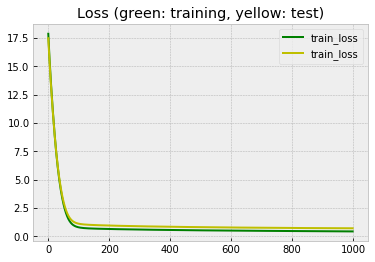

In [4]:
is_regression = False
is_rnn = True
model_param = dict(
    seq_len=seq_len,
    n_hidden_list=[],
    cell_type='lstm',
    n_unit=16,
    bi_direction=True
)

model = Model(is_rnn=is_rnn, model_param=model_param)
learning_param = dict(learning_rate=0.01, max_iter=1000)
model.open_session(use_gpu=False)
model.fit(x_trn, x_tst, y_trn, y_tst, 
          is_regression=is_regression, 
          learning_param=learning_param)
y_trn_hat = model.predict(x_trn)
y_tst_hat = model.predict(x_tst)

visualize_loss(model.trn_loss_list, model.tst_loss_list)
model.close_session()

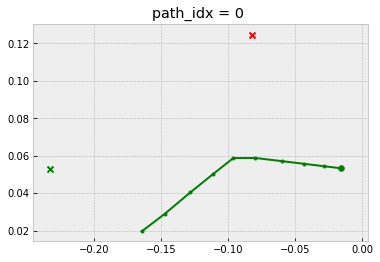

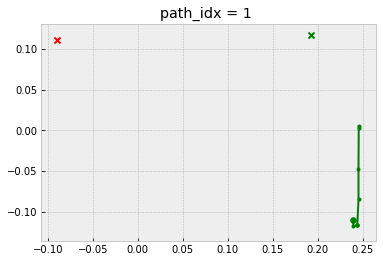

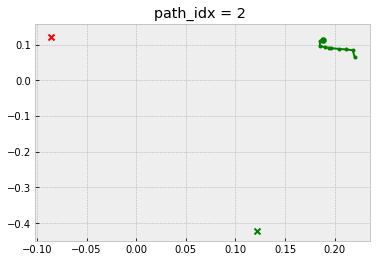

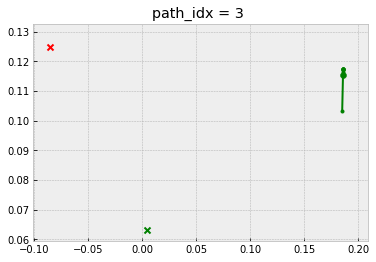

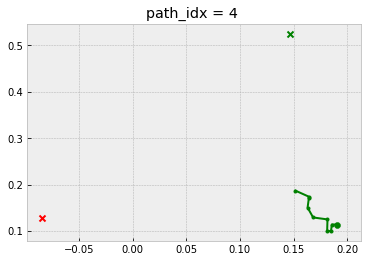

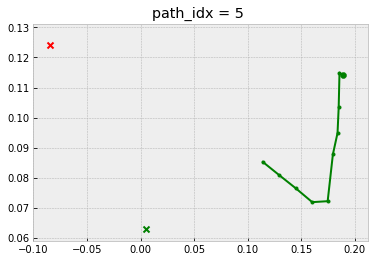

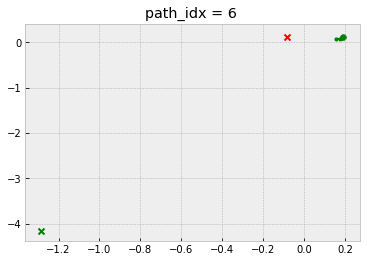

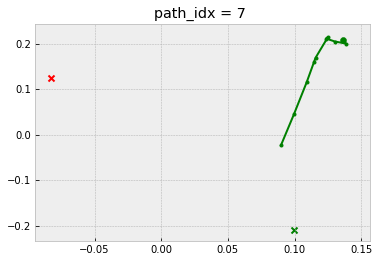

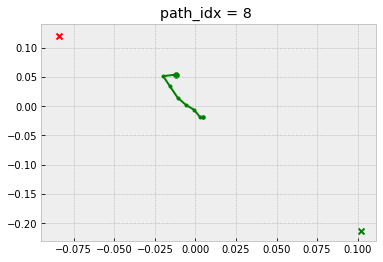

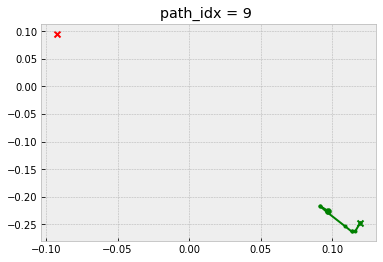

In [5]:
for path_idx in range(10):
    visualize_predicted_destination(x_tst[path_idx], y_tst[path_idx], y_tst_hat[path_idx])
    plt.title('path_idx = {} '.format(path_idx))

In [ ]:
from sklearn.cluster import MeanShift

def n_clusters(path_list):
    dest_list = np.vstack([path.xy[-1] for path in path_list])
    mean_shift = MeanShift().fit(dest_list)
    cluster_centers = mean_shift.cluster_centers_
    return len(cluster_centers)

n_cluster_list = [n_clusters(car) for car in data_loader.raw_data]
plt.scatter(range(len(n_cluster_list)), n_cluster_list)

In [ ]:
n_path_list = [for car in data_loader.raw_data]

In [ ]:
import numpy as np
len_list = np.array([len(car) for car in data_loader.raw_data])
arg_list = np.argsort(len_list)[::-1]
arg_list[:5], arg_list[-5:]